We can start by importing our favourite package: ``elk``!

In [1]:
import elk
import numpy as np

%config InlineBackend.figure_format = "retina" # Not required, only applicable for Jupyter Notebooks

## Lightcurve Setup

Now let's do a simple ensemble lightcurve fit to NGC 419

In [2]:
c = elk.ensemble.EnsembleLC(output_path='.',
                            identifier='NGC 419',
                            location='23.58271, +61.1236',
                            radius=.046,
                            cluster_age=7.75,
                            cutout_size=25,
                            verbose=True,
                            minimize_memory=False)

In [3]:
c.create_output_table()

NGC 419 has 4 observations
Starting Quality Tests for Observation: 0


100%|█| 625/625 [00:11<00:00, 55.87it/s


  Passed Quality Tests 
Starting Quality Tests for Observation: 1


100%|█| 625/625 [00:12<00:00, 49.64it/s


  Passed Quality Tests 
Starting Quality Tests for Observation: 2


100%|█| 625/625 [00:11<00:00, 54.02it/s


  Failed Scattered Light Test 
Starting Quality Tests for Observation: 3


100%|█| 625/625 [01:18<00:00,  7.98it/s


  Failed Scattered Light Test 


## Plotting the lightcurve itself

Let's quickly grab the 3rd lightcurve since that sector is usually looking lovely this time of year

In [4]:
lc = c.lcs[1]

The plotting of the lightcurve itself is rather straightforward!

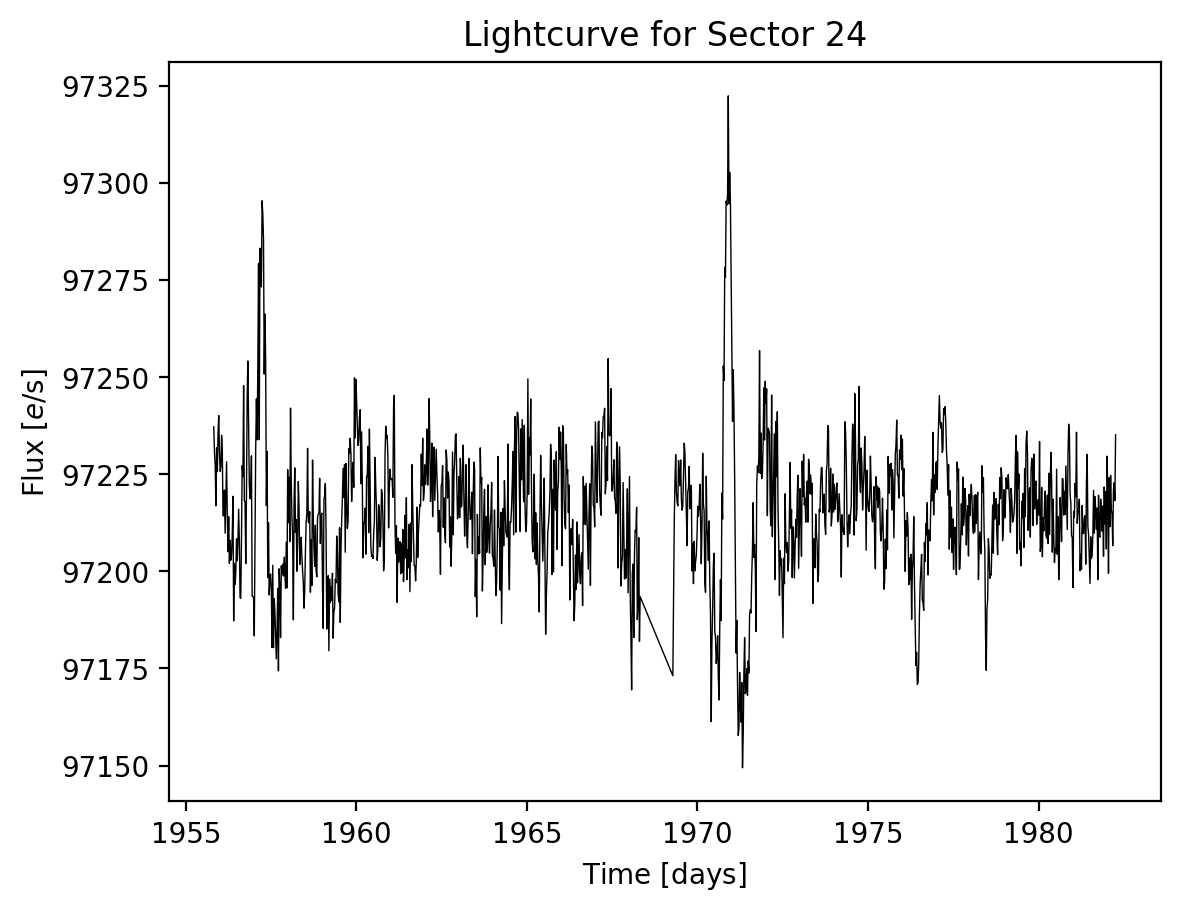

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Lightcurve for Sector 24'}, xlabel='Time $\\rm [days]$', ylabel='Flux $[e / {\\rm s}]$'>)

In [5]:
lc.plot()

But it can also be very flexible if you like

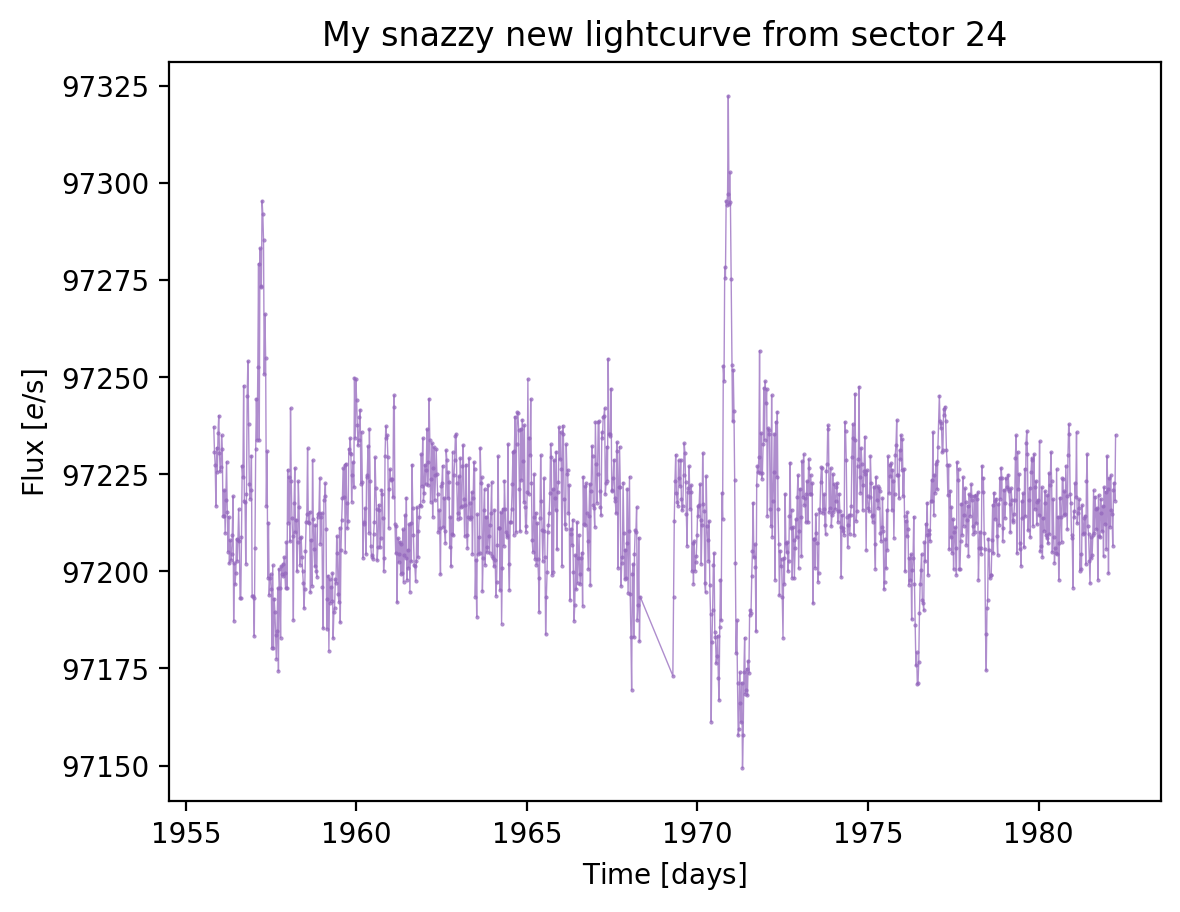

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'My snazzy new lightcurve from sector 24'}, xlabel='Time $\\rm [days]$', ylabel='Flux $[e / {\\rm s}]$'>)

In [6]:
lc.plot(title=f"My snazzy new lightcurve from sector {lc.sector}", color="tab:purple", marker="o", markersize=0.5, alpha=0.75)

## Periodogram plotting

Now let's try plotting out the periodogram, for this we'll need an array of frequencies

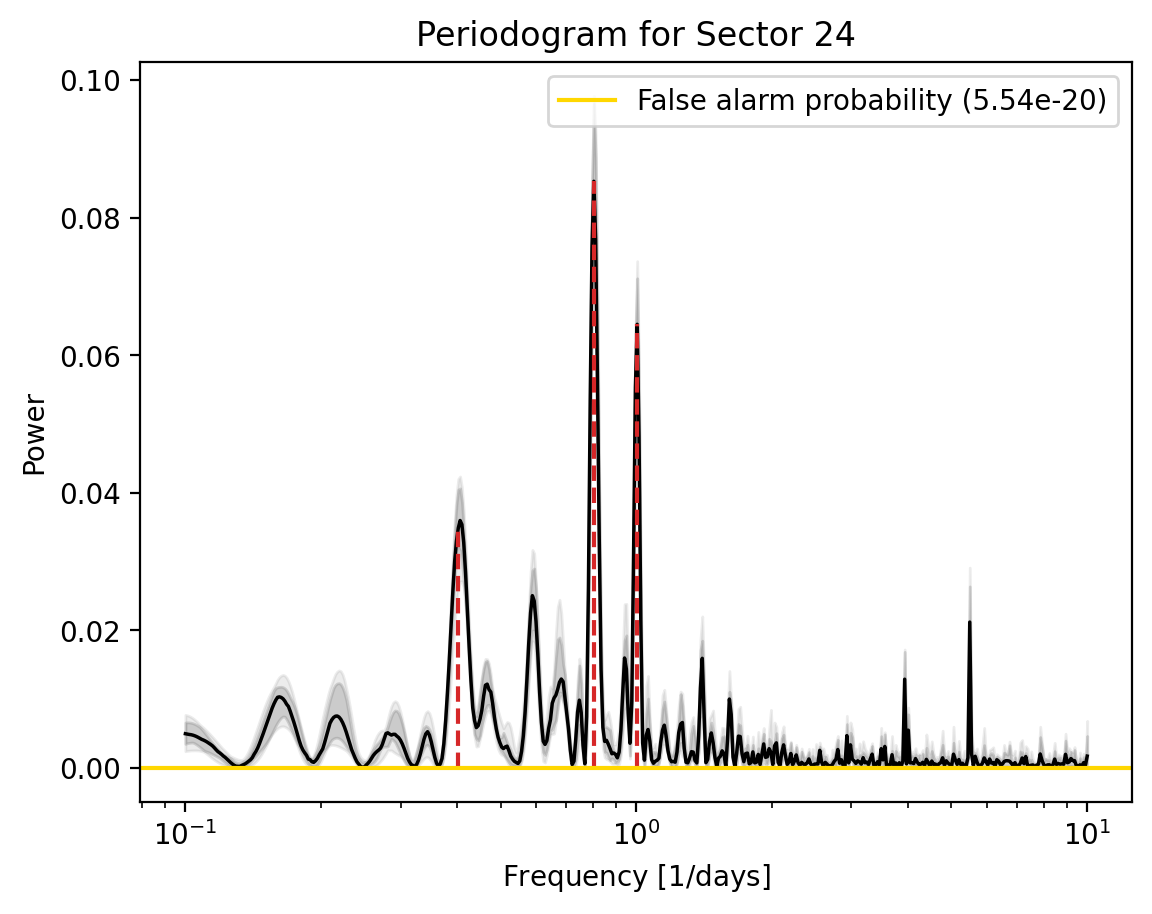

In [7]:
lc.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
_ = lc.plot_periodogram()

This plot can be similarly flexible in how you do things

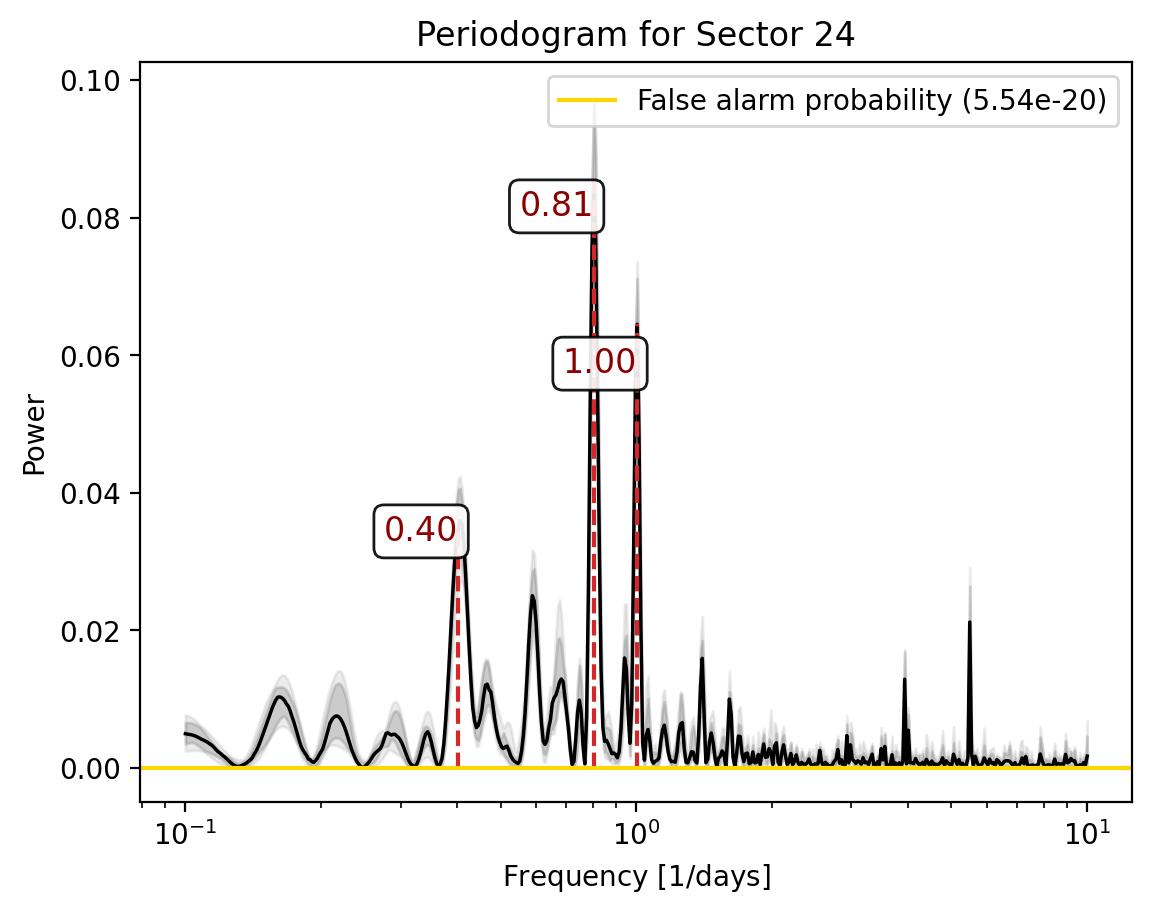

In [8]:
fig, ax = lc.plot_periodogram(show=False)

for peak_ind in range(lc.stats["n_peaks"]):
    peak, peak_power = lc.stats["peak_freqs"][peak_ind], lc.stats["power_at_peaks"][peak_ind]
    ax.annotate(f'{peak:1.2f}', xy=(peak, peak_power), ha="right", va="bottom", color="darkred",
                fontsize="large", bbox=dict(boxstyle="round", fc="white", alpha=0.9))

## Plotting the autocorrelation function

The last of our trio of plots is the autocorrelation function. This one can be used in the same ways as above and can be called as

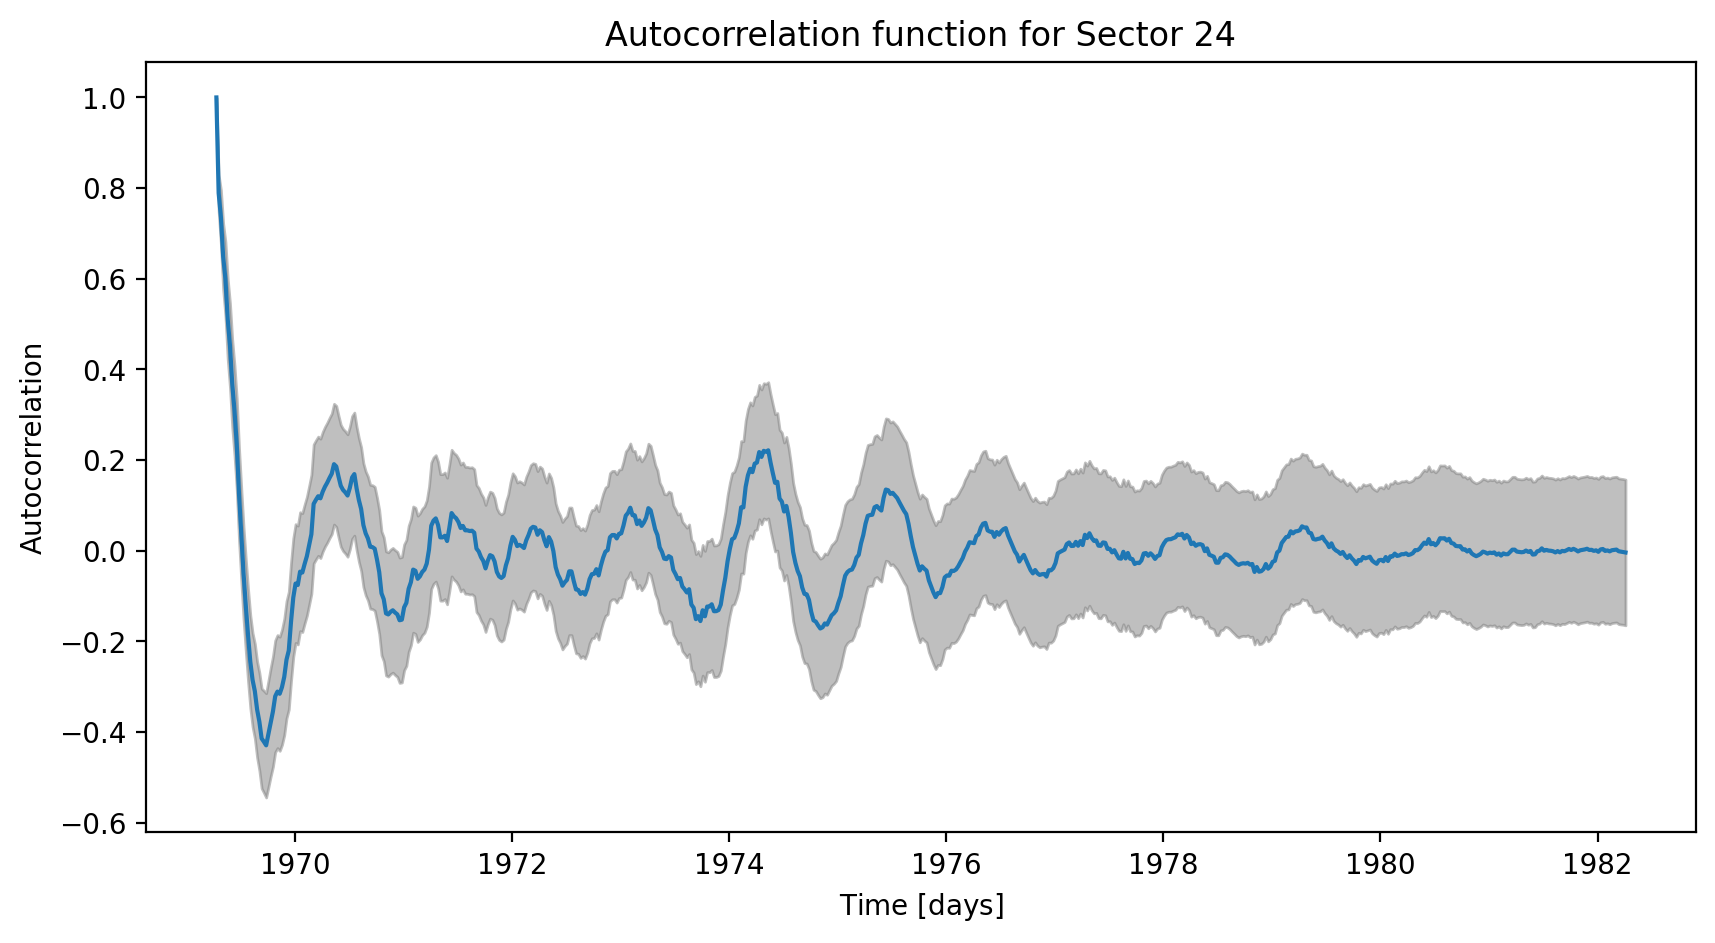

In [9]:
_ = lc.plot_acf()

## All together now

In many cases it can be convenient to get all of these plots quickly and for that purpose we have ``lc.analysis_plot()``

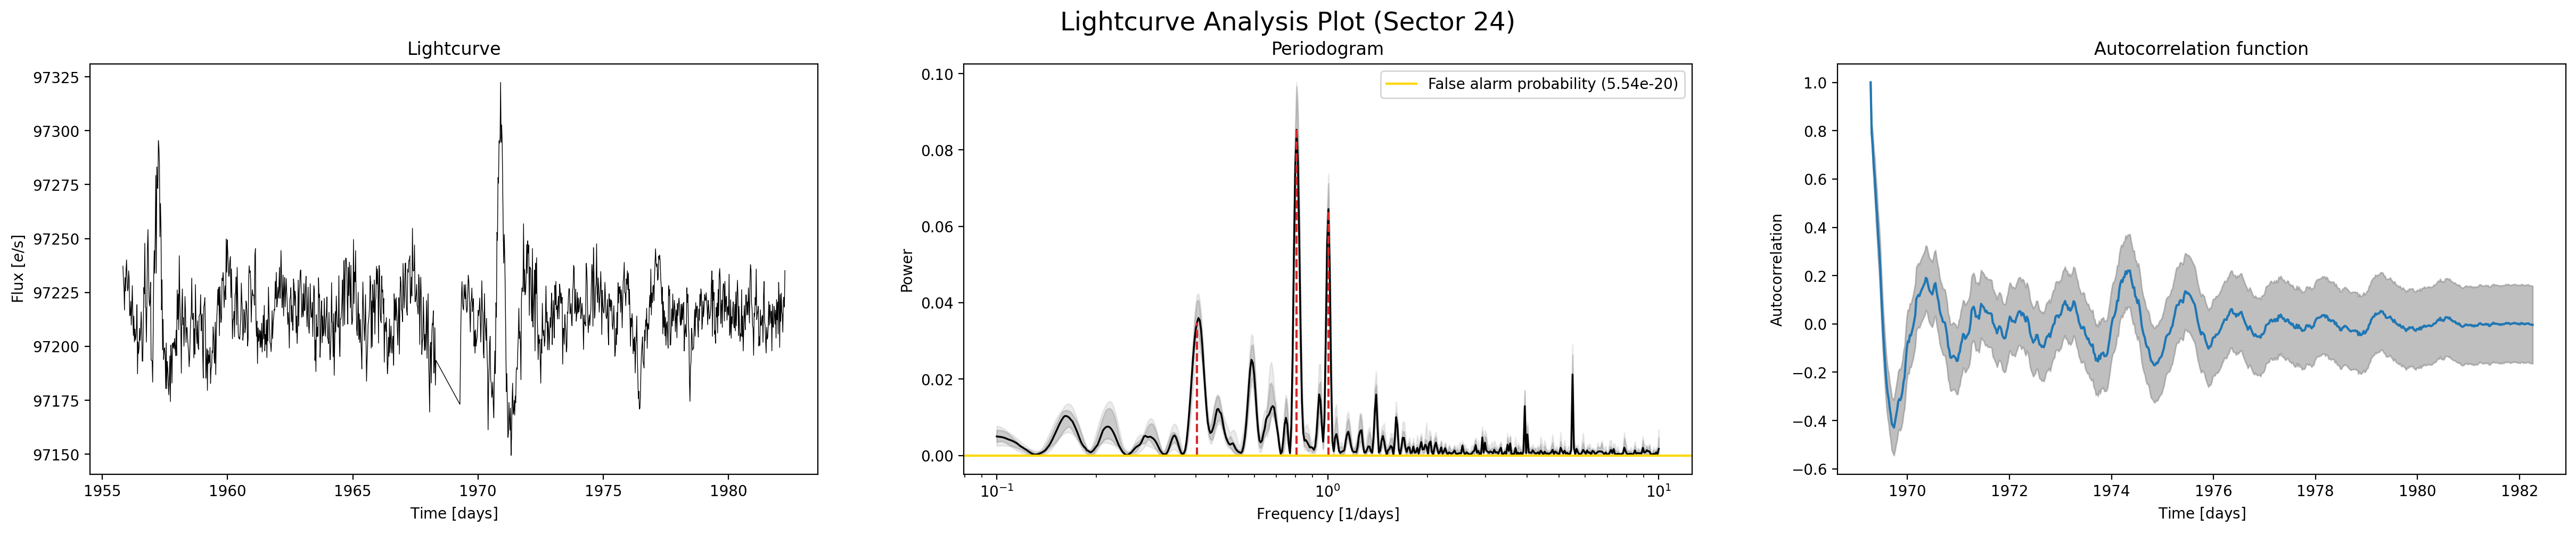

In [10]:
_ = lc.analysis_plot()